# Data exploration of simulated events
## Data import

In [6]:
# Imports
from master_scripts.data_functions import *
from master_scripts.analysis_functions import *
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# CeBr2Mil_Mix.txt -> 2 million mixed samples of simulated events
REPO_ROOT = get_git_root()
DATA_PATH = REPO_ROOT + "data/sample/"

# ================== Import Data ==================
#images = np.load(DATA_PATH + "images_full.npy")
#positions = np.load(DATA_PATH + "positions_full.npy")
#energies = np.load(DATA_PATH + "energies_full.npy")
#labels = np.load(DATA_PATH + "labels_full.npy")
images = np.load(DATA_PATH + "images_sample.npy")
positions = np.load(DATA_PATH + "positions_sample.npy")
energies = np.load(DATA_PATH + "energies_sample.npy")
labels = np.load(DATA_PATH + "labels_sample.npy")

(5002,) (500,) (5,)


In [3]:
# Number of events and shape of array check
n_classes = len(np.unique(labels))

print("Number of classes: {}".format(n_classes))
print("Number of events: {}".format(images.shape[0]))
print("Images shape: {}".format(images.shape))
print("Energies shape: {}".format(energies.shape))
print("Positions shape: {}".format(positions.shape))
print("Labels shape: {}".format(labels.shape))

Number of classes: 2
Number of events: 10000
Images shape: (10000, 16, 16, 1)
Energies shape: (10000, 2)
Positions shape: (10000, 4)
Labels shape: (10000, 1)


In [4]:
# Get sets of indices for separate event types
single, double, close = event_indices(positions)

# Get relative energies and separation distances
sep_dist = separation_distance(positions)
rel_e = relative_energy(energies)

# Basic statistical properties
Means, standard deviations etc.

## Images
num_observations, (min, max), mean, variance, skewness, kurtosis

In [58]:
stats_images = stats.describe(images)
stats_images_single = stats.describe(images[single])
stats_images_double = stats.describe(images[double])

In [128]:
# Print maximum and minimum pixel values seen in image data
print("{:15s}|{:^15s}|{:^15s}|{:^15s}|{:^15s}".format(
    "Image set",
    "pixel min",
    "pixel max",
    "pixel mean",
    "pixel STD (mean)"))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "All images", 
    np.amin(stats_images.minmax[0]),
    np.amax(stats_images.minmax[1]),
    np.mean(stats_images.mean),
    np.mean(np.sqrt(stats_images.variance))))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "Singles", 
    np.amin(stats_images_single.minmax[0]),
    np.amax(stats_images_single.minmax[1]),
    np.mean(stats_images_single.mean),
    np.mean(np.sqrt(stats_images_single.variance))))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "Doubles", 
    np.amin(stats_images_double.minmax[0]),
    np.amax(stats_images_double.minmax[1]),
    np.mean(stats_images_double.mean),
    np.mean(np.sqrt(stats_images_double.variance))))

Image set      |   pixel min   |   pixel max   |  pixel mean   |pixel STD (mean)
All images     |     0.00      |    9951.00    |    157.71     |    429.60     
Singles        |     0.00      |    8033.00    |    105.90     |    350.03     
Doubles        |     0.00      |    9951.00    |    209.57     |    490.51     


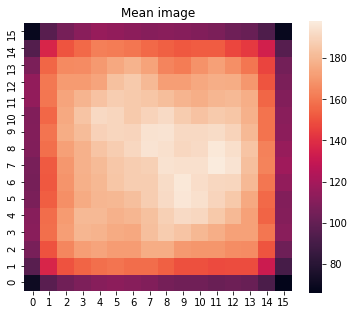

In [53]:
# Plot the mean image
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(stats_images[2].reshape((16,16)), ax=ax, square=True)
ax.set_title("Mean image")
ax.invert_yaxis()

## Positions
nobs, minmax, mean, variance, skewness, kurtosis

In [111]:
stats_positions = stats.describe(positions)
stats_positions_single = stats.describe(positions[single])
stats_positions_double = stats.describe(positions[double])

In [132]:
print("---------- All positions")
pprint(dict(stats_positions._asdict()))
print("STD in coords:", np.sqrt(stats_positions.variance))
print("\n---------- Singles:")
pprint(dict(stats_positions_single._asdict()))
print("STD in coords:", np.sqrt(stats_positions_single.variance))
print("\n----------- Doubles:")
pprint(dict(stats_positions_double._asdict()))
print("STD in coords:", np.sqrt(stats_positions_double.variance))

---------- All positions
{'kurtosis': array([-1.1802267 , -1.20099322, -1.98789951, -1.98785827]),
 'mean': array([  7.9895305 ,   7.98056199, -46.00612341, -46.04153643]),
 'minmax': (array([   0.669378,    0.667048, -100.      , -100.      ]),
            array([15.3322, 15.3287, 15.3307, 15.3314])),
 'nobs': 10000,
 'skewness': array([0.00956452, 0.01232348, 0.00986787, 0.00988899]),
 'variance': array([  17.78535448,   18.07963143, 2926.82788938, 2923.00579721])}
STD in coords: [ 4.2172686   4.25201498 54.10016534 54.06482958]

---------- Singles:
{'kurtosis': array([-1.16872583, -1.19228361, -3.        , -3.        ]),
 'mean': array([   8.00267327,    7.98508928, -100.        , -100.        ]),
 'minmax': (array([   0.673776,    0.667048, -100.      , -100.      ]),
            array([  15.3322,   15.3287, -100.    , -100.    ])),
 'nobs': 5002,
 'skewness': array([0.01536561, 0.00515536, 0.        , 0.        ]),
 'variance': array([17.64319933, 17.80804779,  0.        ,  0.    

## Energies

In [88]:
stats_energies = stats.describe(energies)
stats_energies_single = stats.describe(energies[single])
stats_energies_double = stats.describe(energies[double])

In [133]:
print("---------- All energies")
pprint(dict(stats_energies._asdict()))
print("STD in energies:", np.sqrt(stats_energies.variance))
print("\n---------- Singles:")
pprint(dict(stats_energies_single._asdict()))
print("STD in energies:", np.sqrt(stats_energies_single.variance))
print("\n----------- Doubles:")
pprint(dict(stats_energies_double._asdict()))
print("STD in energies:", np.sqrt(stats_energies_double.variance))

---------- All energies
{'kurtosis': array([-1.19460655, -0.59837564]),
 'mean': array([0.50378424, 0.24757837]),
 'minmax': (array([9.67989e-05, 0.00000e+00]), array([0.999913, 0.999863])),
 'nobs': 10000,
 'skewness': array([-0.03139285,  0.94121651]),
 'variance': array([0.08354483, 0.10285198])}
STD in energies: [0.28904123 0.32070545]

---------- Singles:
{'kurtosis': array([-1.2233669, -3.       ]),
 'mean': array([0.50519574, 0.        ]),
 'minmax': (array([0.00011332, 0.        ]), array([0.999913, 0.      ])),
 'nobs': 5002,
 'skewness': array([-0.02354336,  0.        ]),
 'variance': array([0.08565921, 0.        ])}
STD in energies: [0.29267595 0.        ]

----------- Doubles:
{'kurtosis': array([-1.16560834, -1.20922615]),
 'mean': array([0.50237162, 0.49535489]),
 'minmax': (array([9.67989e-05, 1.89248e-04]), array([0.999753, 0.999863])),
 'nobs': 4998,
 'skewness': array([-0.0406226 ,  0.01530509]),
 'variance': array([0.08144149, 0.08304501])}
STD in energies: [0.285379

# Correlation analysis
Look for correlations between energies and positions

[Text(0, 0.5, 'X1'),
 Text(0, 1.5, 'Y1'),
 Text(0, 2.5, 'X2'),
 Text(0, 3.5, 'Y2'),
 Text(0, 4.5, 'E1'),
 Text(0, 5.5, 'E2'),
 Text(0, 6.5, 'sep_dist'),
 Text(0, 7.5, 'rel_E')]

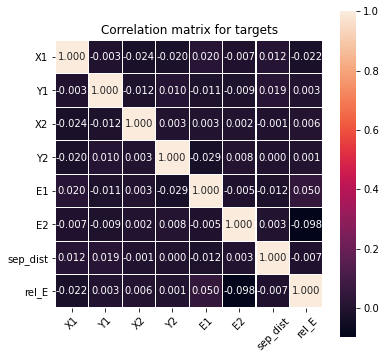

In [6]:
# Concatenate the quantities of interest and draw a reasonable sample size
# from the data to perform calculation on. When the data is huge, this is
# a necessity because np.corrcoef doesn't scale well.
correlation_data = np.concatenate((positions, energies, sep_dist, rel_e), axis=1)
indices = np.random.choice(double, 4000, replace=False)

# Calculate correlation matrix
corr_matrix = np.corrcoef(correlation_data[double], rowvar=False)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(6,6))
ticks = ["X1", "Y1", "X2", "Y2", "E1", "E2", "sep_dist", "rel_E"]
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.3f',
    linewidth=0.2,
    square=True,
    ax=ax,
)
ax.set_title("Correlation matrix for targets")
ax.set_xticklabels(ticks, rotation=45)
ax.set_yticklabels(ticks, rotation=0)



IndexError: index 99997 is out of bounds for axis 0 with size 10000

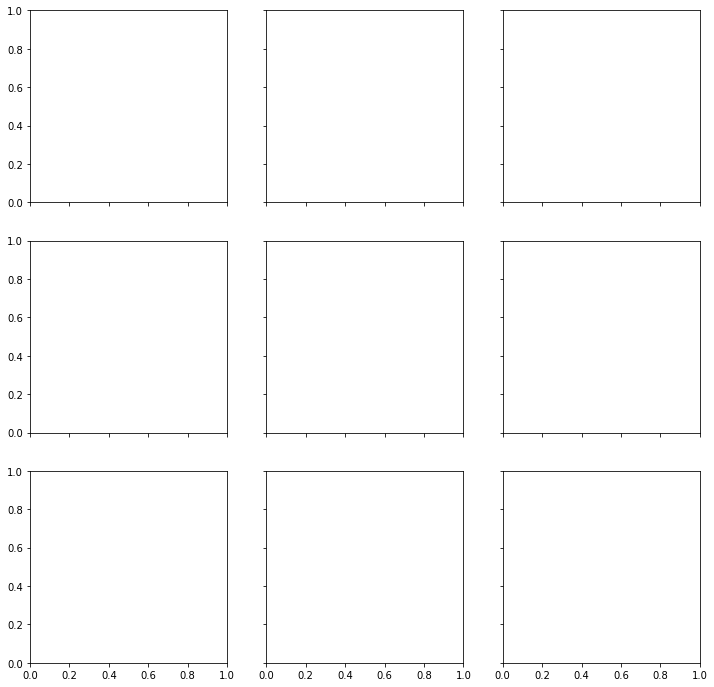

In [7]:
# Plot some images, with electron origin positions
%matplotlib inline

images = images.reshape(images.shape[0],16,16)
index = 9999
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].imshow(images[index + i*3 + j])
        
        # plot origin of event
        x = positions[index + i*3 + j, 0]
        y = positions[index + i*3 + j, 1]
        ax[i, j].plot(x, y, 'rx')
        ax[i, j].set_title('single')
        if positions[index + i*3 + j, 3] != -100:
            x2 = positions[index + i*3 + j, 2]
            y2 = positions[index + i*3 + j, 3]
            ax[i, j].plot(x2, y2, 'rx')
            ax[i, j].set_title('double')
        
plt.show()

In [ ]:
# Plot pixel by pixel intensity
fig, ax = plt.subplots(3, 3, sharex='col', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].plot(range(256), images[index + i*3 + j].flatten())
        ax[i, j].set_title('single')
        if positions[index + i*3 + j, 3] != -100:
            ax[i, j].set_title('double')
plt.show()